In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
csv_path = "mtfuji_data.csv" # Specify the file name (path)

np.set_printoptions(suppress=True) # Set the prohibition of exponential notation
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

In [3]:
print(fuji[:10])

[[   0.         35.134141  139.132082    0.          0.      ]
 [   1.         35.135826  139.129202    0.        322.      ]
 [   2.         35.13751   139.126322    0.        644.      ]
 [   3.         35.139194  139.123441    0.        966.      ]
 [   4.         35.140878  139.12056     0.       1288.      ]
 [   5.         35.142562  139.117679    0.       1611.      ]
 [   6.         35.144246  139.114799    6.62     1933.      ]
 [   7.         35.145929  139.111917    7.21     2255.      ]
 [   8.         35.147613  139.109036   12.2      2577.      ]
 [   9.         35.149297  139.106155   54.41     2899.      ]]


# [Problem 1] Visualization of data

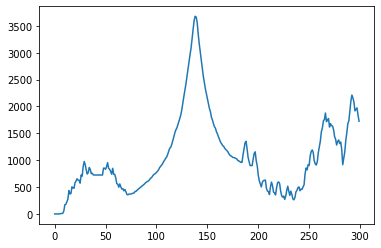

In [4]:
plt.plot(fuji.T[0], fuji.T[3])
plt.show()

# [Problem 2] Create a function to calculate the slope of a point

In [5]:
def calculate_slope(y, x0):
    if x0 < 1 or x0 >= len(y):
        raise IndexError()
    slope = y[x0] - y[x0-1]
    return slope

print(calculate_slope(fuji.T[3], 7))

0.5899999999999999


# [Problem 3] Create a function to calculate the destination

In [6]:
def calculate_destination(current_point, elevation=fuji.T[3], alpha=0.2):
    try:
        y_prime = calculate_slope(elevation, current_point)
    except IndexError as err:
        print(err.args)
        raise
    return (int) (current_point - alpha * y_prime)

print(calculate_destination(10))
print(calculate_destination(0))

-13
()


IndexError: 

# [Problem 4] Creating a function to go down the mountain

In [7]:
def going_down(current_point, elevation=fuji.T[3], number_of_steps=100, alpha=0.2):
    res = [current_point]
    for i in range(number_of_steps):
        current_point = calculate_destination(current_point)
        res.append(current_point)
    return res

path = going_down(136)

# [Problem 5] Visualization of the descent process

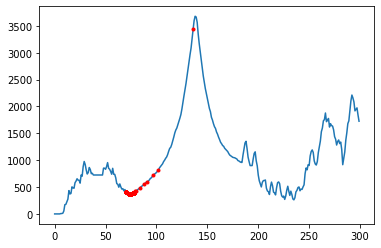

In [8]:
path = going_down(136)
plt.plot(fuji.T[0], fuji.T[3])
plt.plot(path, [fuji.T[3][i] for i in path], 'r.')
plt.show()

# [Problem 6] Change of initial value

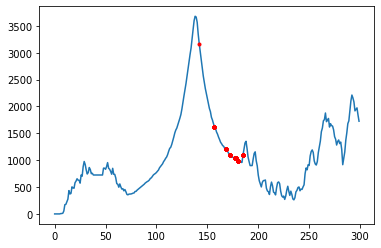

In [9]:
path = going_down(142)
plt.plot(fuji.T[0], fuji.T[3])
plt.plot(path, [fuji.T[3][i] for i in path], 'r.')
plt.show()

# [Problem 7] (Advance problem) Change hyperparameters

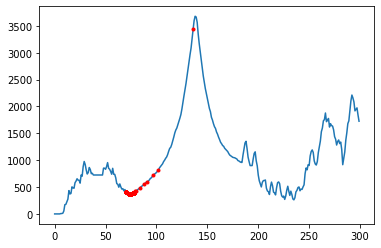

In [12]:
path = going_down(136, alpha=0)
plt.plot(fuji.T[0], fuji.T[3])
plt.plot(path, [fuji.T[3][i] for i in path], 'r.')
plt.show()